<a href="https://colab.research.google.com/github/SVithurabiman/Vision/blob/main/Q1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1

In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train:', x_train.shape)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


print('x_train',x_train.shape)
print('x_test',x_test.shape)
std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)


batch_size = Ntr
iterations =301
lr =1.2e-2
lr_decay=0.999
reg =1e-6
loss_history = []
train_acc_history = []
train_acc_history_2 = []
lr_hist=[]
val_acc_history = []
test_loss=[]
seed = 0
#rng = np.random.default_rng(seed=seed)


#Gradient Descent
for t in range(iterations):
    # Forward pass
  
    h=x_train.dot(w1)+b1

    loss=(1/(batch_size))*(np.sum((h-y_train)**2))+reg*np.sum(w1*w1)
    loss_history.append(loss)


    # Backward pass
    dw1 = (2/batch_size)*((x_train.T.dot(h - y_train))  + reg*w1)
    db1=2*(1/batch_size)*(sum((h-y_train),0))
    b1=b1-lr*db1

    lr_hist.append(lr)
    h=x_test.dot(w1)+b1

    t_loss=(1/(Nte))*(np.sum((h-y_test)**2))+reg*np.sum(w1*w1)
    test_loss.append(t_loss)

    
    valid_pred = [np.argmax(x_train.dot(w1)+b1, axis=1) == np.argmax(y_train,axis=1)]
    temp=np.sum(valid_pred)/len(np.argmax(y_train,axis=1))

    train_acc_history.append(temp)

    valid_pred = [np.argmax(x_test.dot(w1)+b1, axis=1) == np.argmax(y_test,axis=1)]
    temp=np.sum(valid_pred)/len(np.argmax(y_test,axis=1))
    val_acc_history.append(temp)
    w1 -= lr*dw1
    lr = lr*lr_decay

    if ((t+1)%10==0) or (t==1) or (t==2) or(t==0):
        print("Epoch",t+1, "|", "Training Loss",loss_history[-1],"|", "Training Acc:",train_acc_history[-1],'|', "Test Loss",test_loss[-1],"|",'Validation Acc:',val_acc_history[-1] ,'|','Learning Rate:',lr)





x_train: (50000, 32, 32, 3)
x_train (50000, 3072)
x_test (10000, 3072)
w1: (3072, 10)
b1: (10,)
w1 (3072, 10)
Epoch 1 | Training Loss 1.000029360102773 | Training Acc: 0.08748 | Test Loss 0.9952879384609945 | Validation Acc: 0.0889 | Learning Rate: 0.011988
Epoch 2 | Training Loss 0.9594390225491414 | Training Acc: 0.2442 | Test Loss 0.9536474715424385 | Validation Acc: 0.2485 | Learning Rate: 0.011976012000000001
Epoch 3 | Training Loss 0.9416141918493344 | Training Acc: 0.29088 | Test Loss 0.9366198779109014 | Validation Acc: 0.2963 | Learning Rate: 0.011964035988
Epoch 10 | Training Loss 0.8886563128054076 | Training Acc: 0.34428 | Test Loss 0.885120277347032 | Validation Acc: 0.3447 | Learning Rate: 0.011880538562516979
Epoch 20 | Training Loss 0.8529477636358548 | Training Acc: 0.36698 | Test Loss 0.8508701721191638 | Validation Acc: 0.3679 | Learning Rate: 0.011762266377954415
Epoch 30 | Training Loss 0.8322571455382886 | Training Acc: 0.37718 | Test Loss 0.8310954369303345 | Val

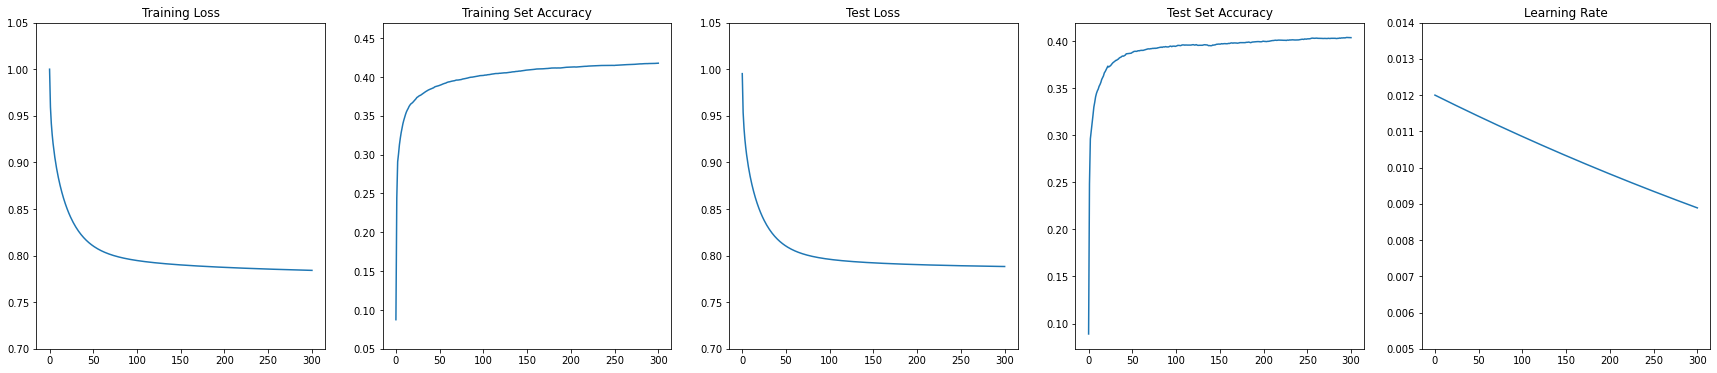

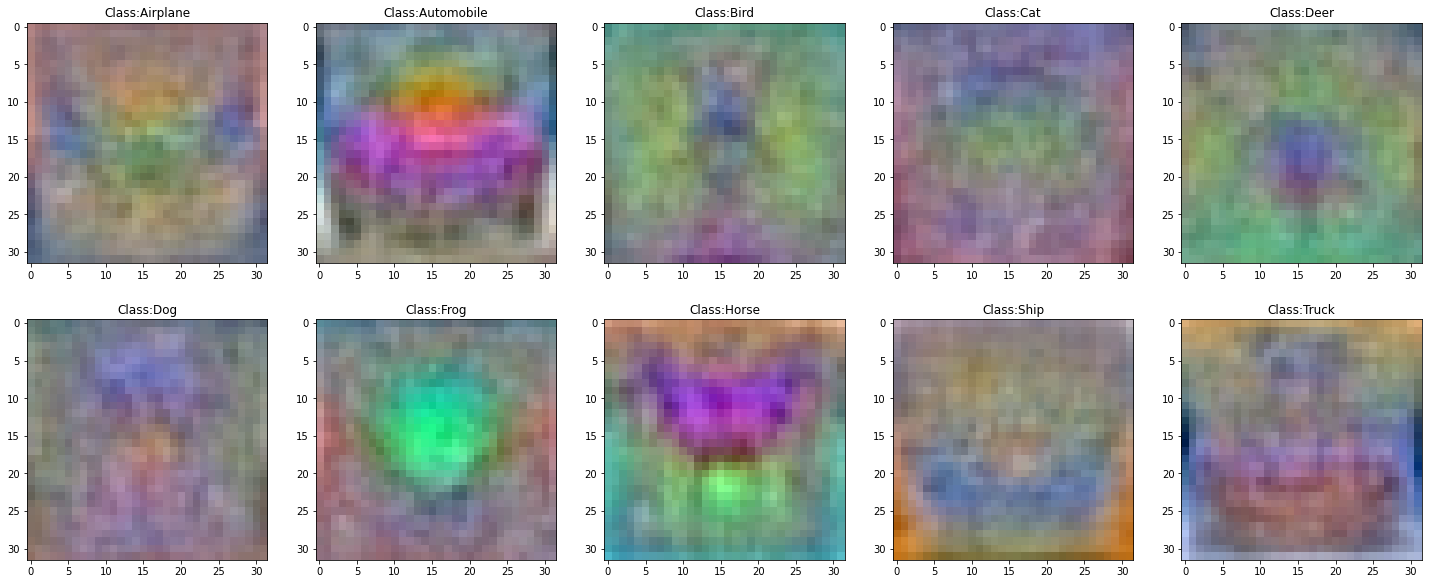

In [10]:
fig, ax = plt.subplots(1,5, figsize=(30,6))
ax[0].plot(loss_history)
ax[0].set_ylim(0.7,1.05)
ax[1].plot(train_acc_history)
ax[1].set_ylim(0.05,0.47)
ax[2].set_ylim(0.05,0.47)
ax[3].plot(val_acc_history)
ax[4].plot(lr_hist)
ax[4].set_ylim(0.005,0.014)
ax[2].plot(test_loss)
ax[2].set_ylim(0.7,1.05)


ax[0].set_title('Training Loss')
ax[1].set_title('Training Set Accuracy')

ax[2].set_title('Test Loss')
ax[3].set_title('Test Set Accuracy')
ax[4].set_title('Learning Rate')

weights_pos =  w1- np.min(w1)# Making the minimum weight zero.
images = ((weights_pos/np.max(weights_pos))*255).astype('uint8')
class_label = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
fig, axes  = plt.subplots(2,5, sharex='all', sharey='all', figsize=(25,10))
#location = 1 # Location of the image in the grid of 2x5
for i in range(K):
    image = images[:,i].reshape(32,32,3)
    plt.subplot(2,5,i+1),plt.imshow(image[:,:,::-1])
    title="Class:"+str(class_label[i])
    plt.title(title) 